<a href="https://colab.research.google.com/github/Bmdhia/sales_predections_revisited/blob/main/Project_1_Revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.10.12
sklearn version: 1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
SEED = 321
np.random.seed(SEED)

In [ ]:
filename = '/content/drive/MyDrive/DataSets/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#1
df.shape

(8523, 12)

In [ ]:
#2
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#3
df.duplicated().sum()

0

In [ ]:
#4
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#6
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
data_types = df.dtypes


In [ ]:
str_cols = data_types[data_types=="object"]


In [ ]:
str_cols = str_cols.index

In [ ]:
for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF',"Low Fat")

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat',"Low Fat")

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg',"Regular")

In [ ]:
# Save the clean dataset in a copy to use it later
df_ml = df.copy()

In [ ]:
for column in df.columns:
    if df[column].dtype.kind in 'biufc':
       print(column,df[column].min().round(0))


Item_Weight 5.0
Item_Visibility 0.0
Item_MRP 31.0
Outlet_Establishment_Year 1985
Item_Outlet_Sales 33.0


In [ ]:
for column in df.columns:
    if df[column].dtype.kind in 'biufc':
       print(column,df[column].max().round(0))


Item_Weight 21.0
Item_Visibility 0.0
Item_MRP 267.0
Outlet_Establishment_Year 2009
Item_Outlet_Sales 13087.0


In [ ]:
for column in df.columns:
    if df[column].dtype.kind in 'biufc':
       print(column,df[column].mean().round(0))


Item_Weight 13.0
Item_Visibility 0.0
Item_MRP 141.0
Outlet_Establishment_Year 1998.0
Item_Outlet_Sales 2181.0


In [ ]:
des = df.describe()
print('min :')
des.iloc[3]

min :


Item_Weight                     4.555
Item_Visibility                 0.000
Item_MRP                       31.290
Outlet_Establishment_Year    1985.000
Item_Outlet_Sales              33.290
Name: min, dtype: float64

In [ ]:
print('max :')
des.iloc[7]

max :


Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
Name: max, dtype: float64

In [ ]:
print('mean :')
des.iloc[1]

mean :


Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Name: mean, dtype: float64

In [ ]:
#its a float so its recommended to impute it missing values with the mean
df['Item_Weight'].fillna(value =df['Item_Weight'].mean(),inplace=True )

In [ ]:
#its an object so its recommended to impute it missing values with the mode
df['Outlet_Size'].fillna(value =df['Outlet_Size'].mode(),inplace=True )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
import matplotlib as mpl

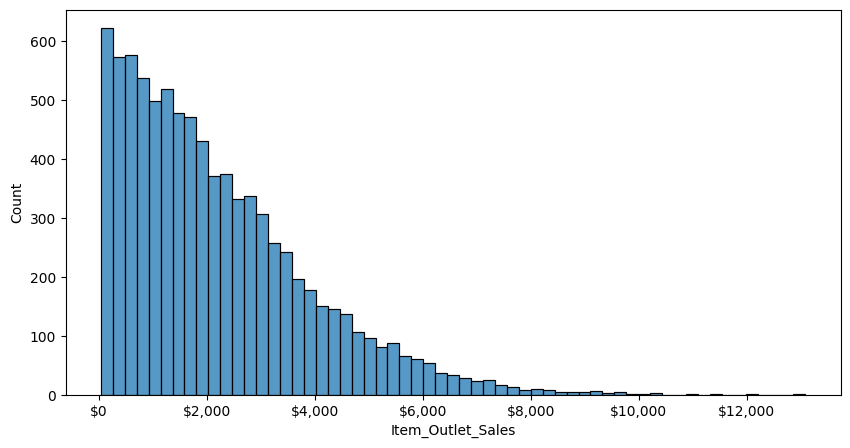

In [ ]:
fig, ax = plt.subplots(figsize=(10,5));
sns.histplot(data=df, x='Item_Outlet_Sales', ax=ax)
abc = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(abc)

<ipython-input-33-49402959770a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)


<Axes: >

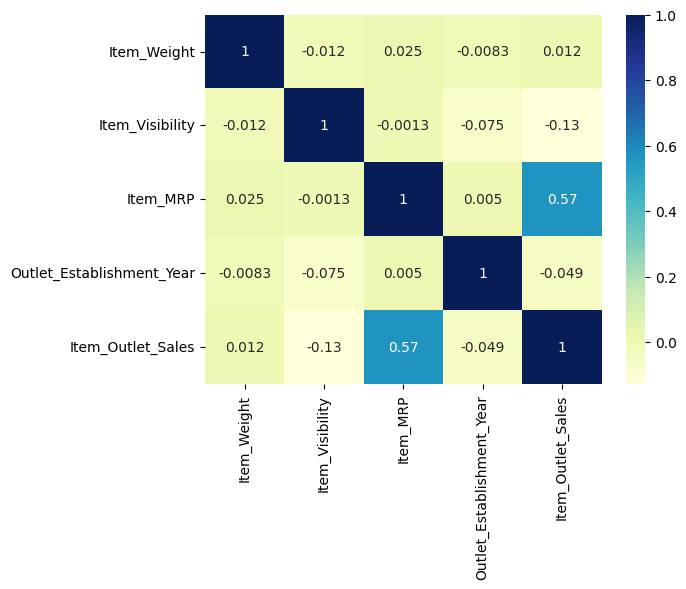

In [ ]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

There is a quite strong positive correlation between item mrp and item outlet sales

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

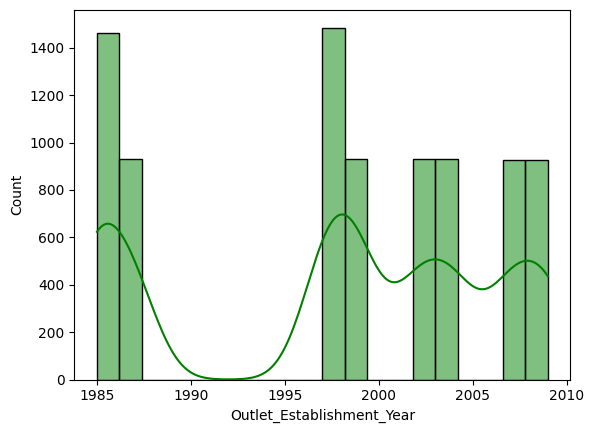

In [ ]:
sns.histplot(data=df, x="Outlet_Establishment_Year", kde=True ,bins=20 , color="Green")

The histogram above illustrates that the highest number of outlet stores were opened in 1986 and 1998. These particular years coincide with a period of notable economic stability and growth in the United States. During this time, the government prioritized initiatives aimed at fostering economic development and encouraging entrepreneurship.

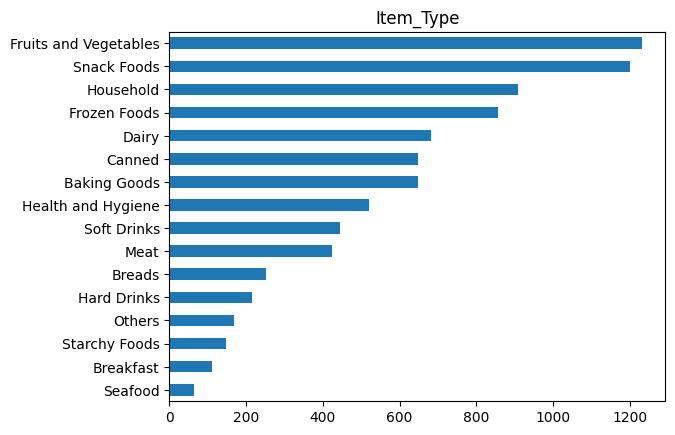

In [ ]:
df['Item_Type'].value_counts(ascending=True).plot(kind = 'barh');
plt.title('Item_Type')
plt.show();

Fruits and vegetables are the most consumed

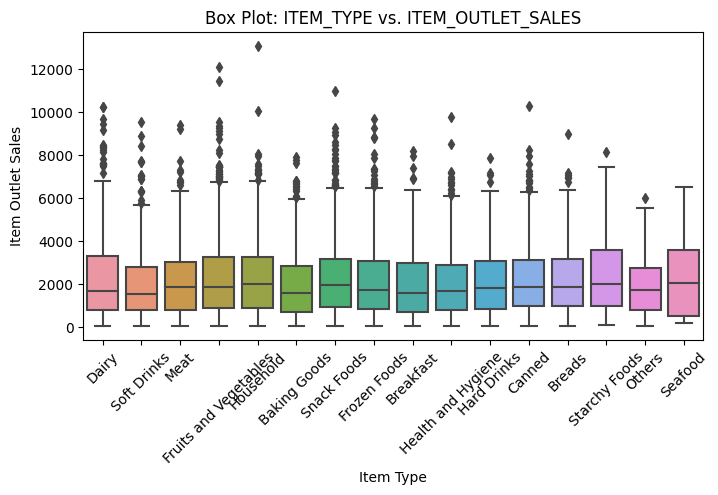

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
plt.title('Box Plot: ITEM_TYPE vs. ITEM_OUTLET_SALES')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

We can compare the distribution of sales across different item types. This can help identify any variations in sales performance based on item types.

# Time to use machine learning


In [ ]:
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_ml = df_ml.drop(columns=['Item_Identifier'])

In [ ]:
df_ml.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df_ml.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_ml.duplicated().sum()

0

In [ ]:
cat = df_ml.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
for col in cat:
        print(f"Column: {col}")
        print(df[col].value_counts())
        print("\n")

Column: Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Column: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Column: Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Column: Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Column: Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    

* Identify the features (X) and target (y) :

In [ ]:
X = df_ml.drop(columns='Item_Outlet_Sales')
y = df_ml['Item_Outlet_Sales']

* Perform a train test split :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

* Create a preprocessing object to prepare the dataset for Machine Learning :

In [ ]:
num_cols = X_train.select_dtypes('number').drop(columns='Outlet_Establishment_Year').columns
ord_cols = ['Outlet_Size']
nom_cols = X_train.select_dtypes('object').drop(columns=['Outlet_Size']).columns

In [ ]:
#Numeric
scaler = StandardScaler()
impute_mean = SimpleImputer()
num_pipe = make_pipeline(impute_mean)

#Nominal
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')

#Ordinal
impute_freq = SimpleImputer(strategy='most_frequent')
the_list = ['Small', 'High', 'Medium']
ord_encoder = OrdinalEncoder(categories=[the_list])
scaler_ord = StandardScaler()
ord_pipe = make_pipeline(impute_freq, ord_encoder)

#Tuples

num_tuple = ('numeric', num_pipe, num_cols)
nom_tuple = ('Nominal', ohe_encoder, nom_cols)
ord_tuple = ('ordinal', ord_pipe, ord_cols)


In [ ]:
preprocessor = ColumnTransformer([num_tuple, nom_tuple, ord_tuple],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)

In [ ]:
#preprocessor.fit(X_train)

In [ ]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Size', 'Outlet_Establishment_Year'

In [ ]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Establishment_Year
4776,16.35,0.029565,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2009
7510,15.25,0.000000,179.7660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2009
5828,12.35,0.158716,157.2946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1999


In [ ]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Establishment_Year
7503,14.30,0.026300,79.4302,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1987
2957,7.93,0.071136,42.7086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1997
7031,14.50,0.041313,42.0454,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1999


In [ ]:
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)

* CRISP-DM Phase 4 - Modeling :



In [ ]:
def eval_model(train_true, test_true, train_pred, test_pred):
    RMSE_train = mean_squared_error(train_true, train_pred, squared=False)
    r2_train = r2_score(train_true, train_pred)

    RMSE_test = mean_squared_error(test_true, test_pred, squared=False)
    r2_test = r2_score(test_true, test_pred)

    print(f"Train Set:   R2 score: {r2_train:.3f}   RMSE: {RMSE_train:.2f}")
    print(f"Test Set:    R2 score: {r2_test:.3f}   RMSE: {RMSE_test:.2f}")

 Linear regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
y_pred_train = lin_reg.predict(X_train_df)
y_pred_test = lin_reg.predict(X_test_df)

In [ ]:
eval_model(y_train, y_test, y_pred_train, y_pred_test)

Train Set:   R2 score: 0.562   RMSE: 1139.10
Test Set:    R2 score: 0.567   RMSE: 1092.86


### 📢 Feature Importance :

In [ ]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs

Item_Weight                          -1.941817
Item_Visibility                    -423.390180
Item_MRP                             15.720924
Item_Fat_Content_Regular             62.625234
Item_Type_Breads                    -28.648318
Item_Type_Breakfast                  45.361064
Item_Type_Canned                     27.516194
Item_Type_Dairy                    -106.335014
Item_Type_Frozen Foods               -1.770626
Item_Type_Fruits and Vegetables      45.754029
Item_Type_Hard Drinks                13.894899
Item_Type_Health and Hygiene         27.025414
Item_Type_Household                   5.509746
Item_Type_Meat                      -11.864887
Item_Type_Others                    -26.813726
Item_Type_Seafood                   327.501136
Item_Type_Snack Foods               -21.932393
Item_Type_Soft Drinks               -39.485735
Item_Type_Starchy Foods              42.088865
Outlet_Identifier_OUT013            335.618464
Outlet_Identifier_OUT017            223.891190
Outlet_Identi

In [ ]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Item_Weight                          -1.94
Item_Visibility                    -423.39
Item_MRP                             15.72
Item_Fat_Content_Regular             62.63
Item_Type_Breads                    -28.65
Item_Type_Breakfast                  45.36
Item_Type_Canned                     27.52
Item_Type_Dairy                    -106.34
Item_Type_Frozen Foods               -1.77
Item_Type_Fruits and Vegetables      45.75
Item_Type_Hard Drinks                13.89
Item_Type_Health and Hygiene         27.03
Item_Type_Household                   5.51
Item_Type_Meat                      -11.86
Item_Type_Others                    -26.81
Item_Type_Seafood                   327.50
Item_Type_Snack Foods               -21.93
Item_Type_Soft Drinks               -39.49
Item_Type_Starchy Foods              42.09
Outlet_Identifier_OUT013            335.62
Outlet_Identifier_OUT017            223.89
Outlet_Identifier_OUT018          1,001.80
Outlet_Identifier_OUT019           -663.60
Outlet_Iden

In [ ]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

Outlet_Type_Supermarket Type3     34.50
Outlet_Identifier_OUT027          34.50
Outlet_Type_Supermarket Type1     33.00
Outlet_Type_Supermarket Type2     32.00
Outlet_Identifier_OUT018          31.00
Outlet_Identifier_OUT019          30.00
Item_Visibility                   29.00
Outlet_Location_Type_Tier 2       28.00
Outlet_Identifier_OUT049          27.00
Outlet_Location_Type_Tier 3       26.00
Outlet_Identifier_OUT013          25.00
Item_Type_Seafood                 24.00
Outlet_Identifier_OUT046          23.00
Outlet_Identifier_OUT035          22.00
Outlet_Identifier_OUT017          21.00
Item_Type_Dairy                   20.00
Outlet_Identifier_OUT045          19.00
Item_Fat_Content_Regular          18.00
Item_Type_Fruits and Vegetables   17.00
Item_Type_Breakfast               16.00
Item_Type_Starchy Foods           15.00
Item_Type_Soft Drinks             14.00
Outlet_Establishment_Year         13.00
Item_Type_Breads                  12.00
Item_Type_Canned                  11.00


In [ ]:
top_n_features = coeff_rank.head(3)
top_n_features

Outlet_Type_Supermarket Type3   34.50
Outlet_Identifier_OUT027        34.50
Outlet_Type_Supermarket Type1   33.00
dtype: float64

In [ ]:
## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

Outlet_Type_Supermarket Type3   1,478.82
Outlet_Identifier_OUT027        1,478.82
Outlet_Type_Supermarket Type1   1,338.20
dtype: float64

In [ ]:
top_n = 3
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Type_Supermarket Type1   1,338.20
Outlet_Type_Supermarket Type3   1,478.82
Outlet_Identifier_OUT027        1,478.82
dtype: float64

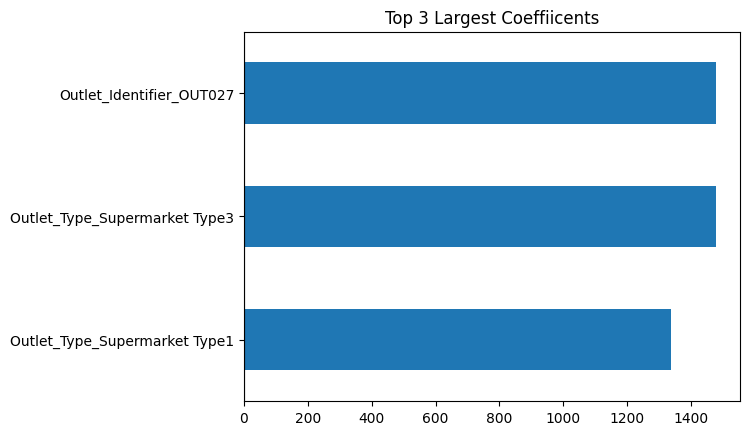

In [ ]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

In our plot, the top 3 features with the largest coefficients are Outlet_Identifier_OUT027 (1.478), Outlet_Type_Supermarket Type3 (1.478), and Outlet_Type_Supermarket Type1 (1.338).

Decision tree

In [ ]:
from sklearn import metrics

In [ ]:
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [ ]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [ ]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

Training Data:	R^2= 0.94	RMSE= 431.10
Test Data:	R^2= 0.55	RMSE= 1110.68


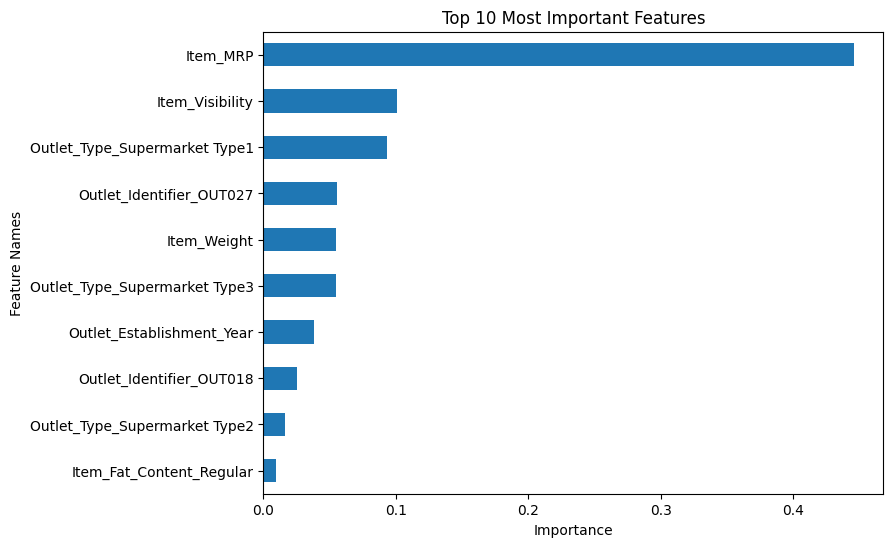

In [ ]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);

### Saving ( joblib ) :

In [ ]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
          'LinearRegression':lin_reg,
         'RandomForest':reg}
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']